<a href="https://colab.research.google.com/github/Tony966012/project-1/blob/main/Final_version_of_Portfolio_Optimization_0608G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction based on LSTM forecasting model with data downloaded from Yahoo Finance


In [69]:
# Import pandas and yfinance
import pandas as pd
import yfinance as yf

# Import numpy
import numpy as np
from numpy import *
from numpy.linalg import multi_dot

# Plot settings
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = 16, 8
# Data manipulation
import pandas as pd
import numpy as np
from numpy.linalg import multi_dot

from scipy.stats import norm
from tabulate import tabulate

# Import matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt


In [70]:
# MTSLX STOCK LIST
symbols = ['MDB', 'TSLA', 'SHEL', 'LGFRY','XOM']


# Number of assets
numofasset = len(symbols)

# Number of portfolio for optimization
numofportfolio = 5000

In [71]:
from google.colab import drive
drive.mount('/content/drive')
excel_file_path = '/content/drive/MyDrive/申请表1海南/new_prediction.xlsx'
excel_data = pd.read_excel(excel_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
df = excel_data
# Check first 5 values
df.head()

,AAPL,META,AMZN,MSFT,NVDA
0,154.533340,164.952332,120.849236,258.912903,183.139053
1,156.177460,165.510117,122.560974,264.015137,187.129532
2,158.052399,164.528793,125.949142,268.661285,189.347092
3,159.679611,162.733261,128.748688,270.821075,189.502594
4,158.984970,161.827972,130.603943,270.309204,190.488739


In [73]:
#df = pd.read_csv('predictions_c.csv', index_col=0, parse_dates=True, encoding='latin-1',error_bad_lines=False)
# Check first 5 values
#df.head()

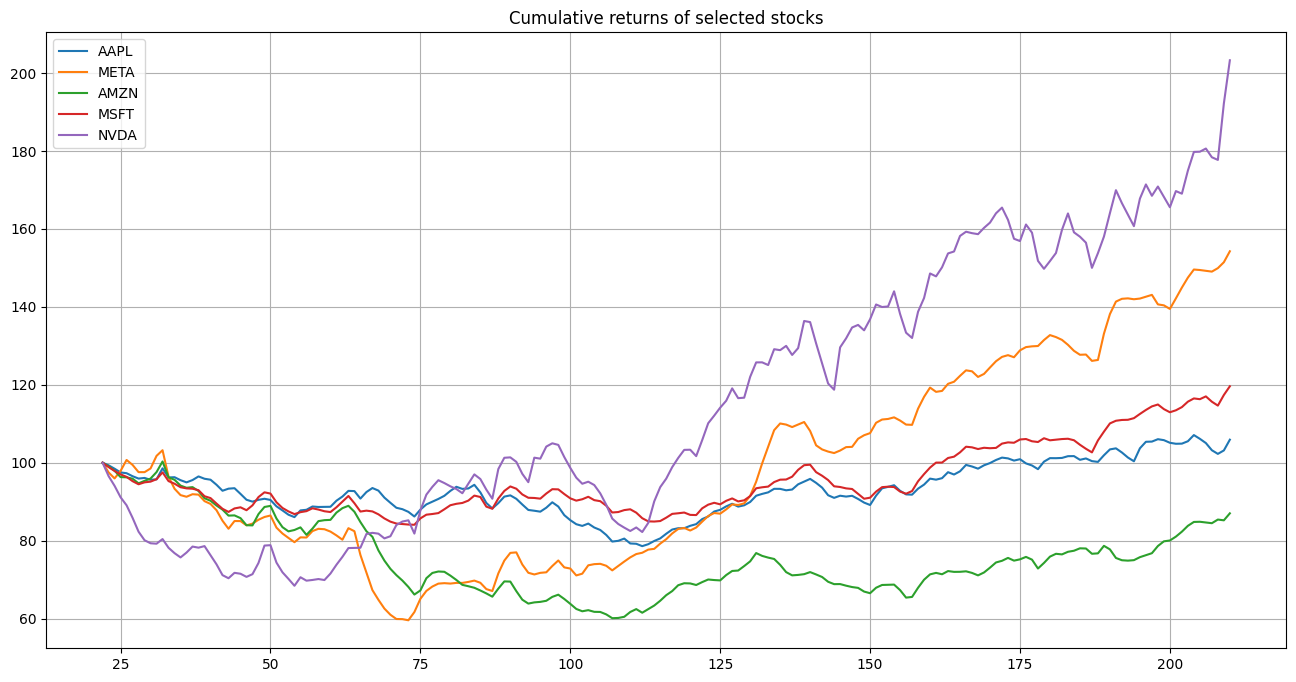

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax = plt.axes()

ax.set_title('Cumulative returns of selected stocks')
ax.plot(df[-189:] / df.iloc[-189] * 100)
ax.legend(df.columns, loc='upper left')
ax.grid(True)

plt.show()


In [74]:
# Calculate returns
returns = df.pct_change().fillna(0)
returns.head()

,AAPL,META,AMZN,MSFT,NVDA
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.010639,0.003381,0.014164,0.019706,0.021789
2,0.012005,-0.005929,0.027645,0.017598,0.011850
3,0.010295,-0.010913,0.022228,0.008039,0.000821
4,-0.004350,-0.005563,0.014410,-0.001890,0.005204


In [75]:
# Calculate annual returns
annual_returns = (returns.mean() * 189)
annual_returns

,0
AAPL,0.109389
META,0.413487
AMZN,0.003656
MSFT,0.204412
NVDA,0.661751


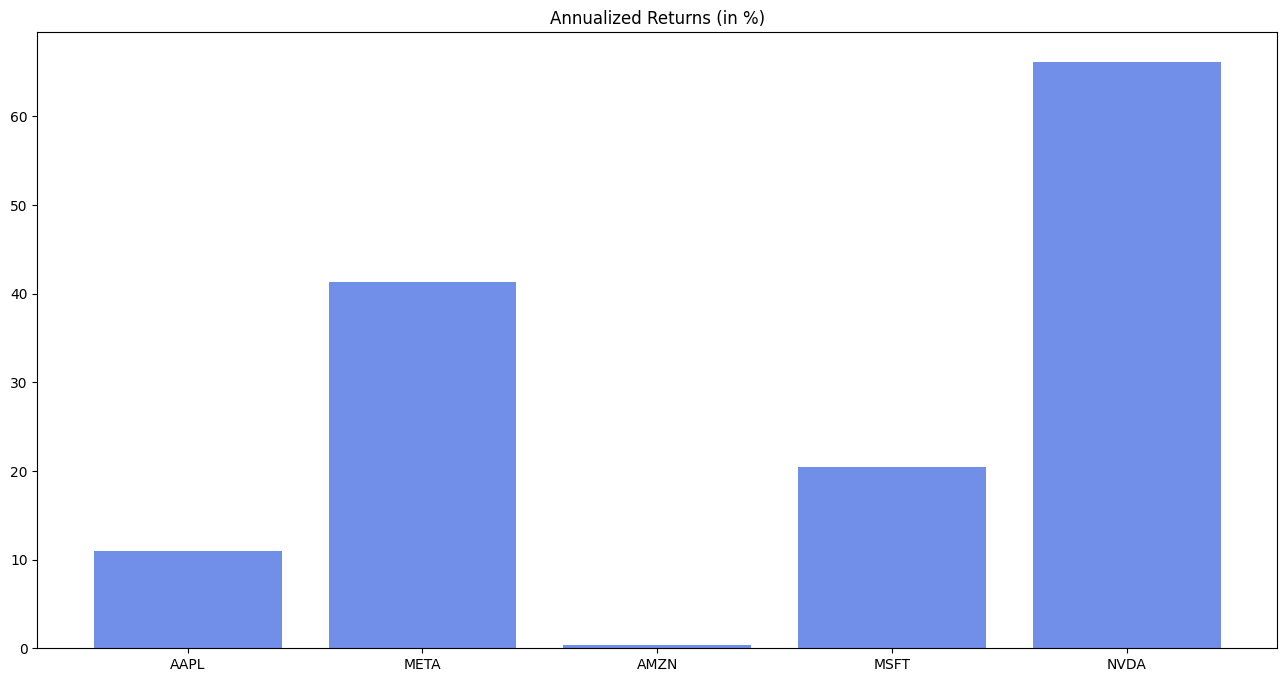

In [76]:
# Visualize the data
fig = plt.figure()
ax =plt.axes()

ax.bar(annual_returns.index, annual_returns*100, color='royalblue', alpha=0.75)
ax.set_title('Annualized Returns (in %)');

In [77]:
vols = returns.std()
vols

,0
AAPL,0.011564
META,0.019947
AMZN,0.016303
MSFT,0.011036
NVDA,0.027363


In [78]:
# Calculate annualized volatilities
annual_vols = vols*sqrt(252)
annual_vols

,0
AAPL,0.183569
META,0.316650
AMZN,0.258802
MSFT,0.175192
NVDA,0.434372


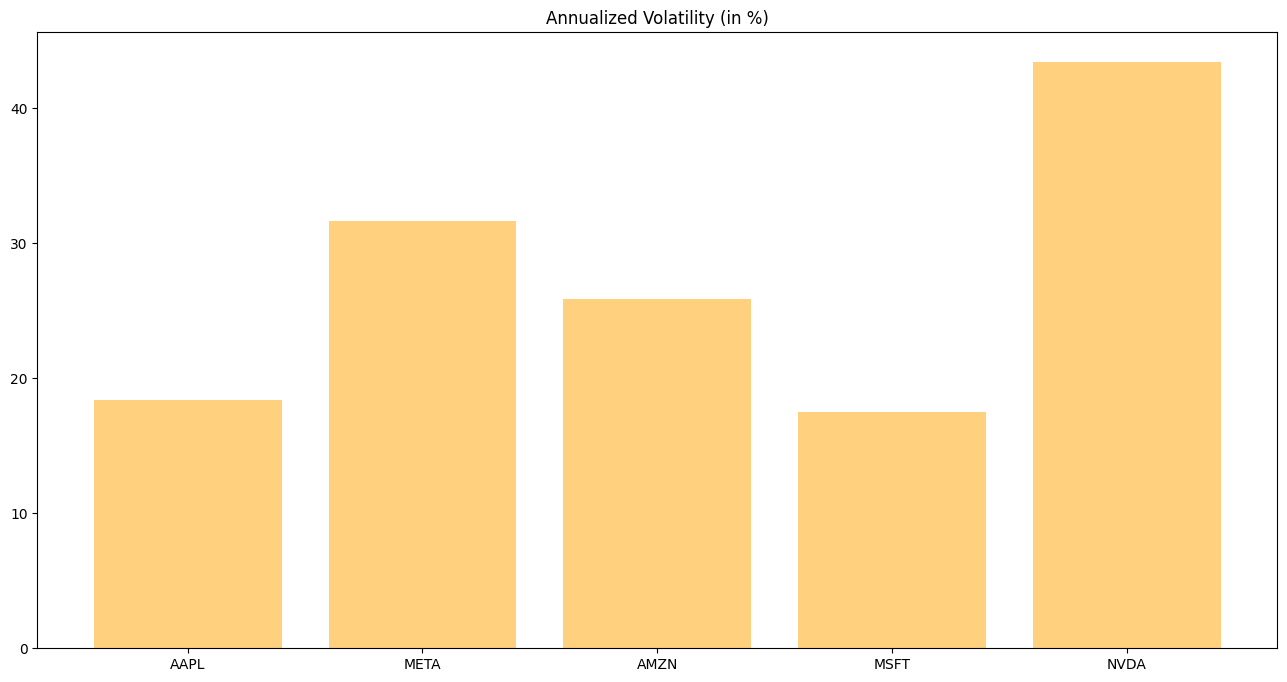

In [79]:
# Visualize the data
fig = plt.figure()
ax = plt.axes()

ax.bar(annual_vols.index, annual_vols*100, color='orange', alpha=0.5)
ax.set_title('Annualized Volatility (in %)');

In [80]:
wts = numofasset * [1./numofasset]
array(wts).shape

(5,)

In [81]:
wts = numofasset * [1./numofasset]
wts = array(wts)[:,newaxis]
wts

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [82]:
wts.shape

(5, 1)

In [83]:
ret = array(returns.mean() * 252)[:,newaxis]
ret



array([[0.14585198],
       [0.55131664],
       [0.00487412],
       [0.27254922],
       [0.88233442]])

In [84]:
ret = array(returns.mean() * 252)[:,newaxis]
ret

array([[0.14585198],
       [0.55131664],
       [0.00487412],
       [0.27254922],
       [0.88233442]])

In [85]:
ret.shape

(5, 1)

In [86]:
# Portfolio returns
wts.T @ ret

array([[0.37138528]])

In [87]:
# Covariance matrix
cov = returns.cov() * 252
cov

,AAPL,META,AMZN,MSFT,NVDA
AAPL,0.033698,0.030545,0.030784,0.024649,0.051985
META,0.030545,0.100267,0.048475,0.035346,0.064676
AMZN,0.030784,0.048475,0.066978,0.028803,0.060622
MSFT,0.024649,0.035346,0.028803,0.030692,0.049006
NVDA,0.051985,0.064676,0.060622,0.049006,0.188679


In [88]:
# Portfolio variance
var = multi_dot([wts.T, cov, wts])
var

array([[0.05080386]])

In [89]:
# Portfolio volatility
sqrt(var)

array([[0.22539712]])

In [90]:
def portfolio_stats(weights):

    weights = array(weights)[:,newaxis]
    port_rets = weights.T @ array(returns.mean() * 252)[:,newaxis]
    port_vols = sqrt(multi_dot([weights.T, returns.cov() * 252, weights]))

    return np.array([port_rets, port_vols, port_rets/port_vols]).flatten()

In [91]:
w = random.random(numofasset)[:, newaxis]
w

array([[0.45371853],
       [0.29445669],
       [0.65212945],
       [0.65739302],
       [0.00873442]])

In [92]:
# Set weights such that sum of weights equals 1
w /= sum(w)
w

array([[0.21956615],
       [0.14249522],
       [0.31558232],
       [0.3181295 ],
       [0.00422681]])

In [93]:
# Initialize the lists
rets = []; vols = []; wts = []

# Simulate 5,000 portfolios
for i in range (5000):

    # Generate random weights
    weights = random.random(numofasset)[:, newaxis]

    # Set weights such that sum of weights equals 1
    weights /= sum(weights)

    # Portfolio statistics
    rets.append(weights.T @ array(returns.mean() * 252)[:, newaxis])
    vols.append(sqrt(multi_dot([weights.T, returns.cov()*252, weights])))
    wts.append(weights.flatten())

# Record values
port_rets = array(rets).flatten()
port_vols = array(vols).flatten()
port_wts = array(wts)

In [94]:
# Create a dataframe for analysis
msrp_df = pd.DataFrame({'returns': port_rets,
                      'volatility': port_vols,
                      'sharpe_ratio': port_rets/port_vols,
                      'weights': list(port_wts)})
msrp_df.head()

,returns,volatility,sharpe_ratio,weights
0,0.418744,0.276112,1.516573,"[0.014706797816955296, 0.04812060440333622, 0...."
1,0.246623,0.198043,1.245296,"[0.32053037849474, 0.12903926065084864, 0.2527..."
2,0.323544,0.215138,1.503890,"[0.13445517228179693, 0.38314050396851684, 0.1..."
3,0.416021,0.236528,1.758865,"[0.21267556349050912, 0.04134826721689532, 0.1..."
4,0.255371,0.202007,1.264169,"[0.2253270308472276, 0.1556300192477481, 0.287..."


In [95]:
# Summary Statistics
msrp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
returns,5000.0,0.371946,0.090311,0.090654,0.311035,0.372347,0.429610,0.747763
volatility,5000.0,0.230218,0.023388,0.169737,0.213604,0.228758,0.244460,0.357647
sharpe_ratio,5000.0,1.598919,0.272208,0.437867,1.437092,1.623640,1.794744,2.203366


### Maximum Sharpe Ratio Portfolio

In [96]:
# Max sharpe ratio portfolio
msrp = msrp_df.iloc[msrp_df['sharpe_ratio'].idxmax()]
msrp

,4696
returns,0.689686
volatility,0.313015
sharpe_ratio,2.203366
weights,"[0.006282135000232542, 0.4465791905287543, 0.0..."


In [97]:
# Max sharpe ratio portfolio weights
max_sharpe_port_wts = msrp_df['weights'][msrp_df['sharpe_ratio'].idxmax()]

# Allocation to achieve max sharpe ratio portfolio
dict(zip(symbols,np.around(max_sharpe_port_wts*100,2)))

{'MDB': np.float64(0.63),
 'TSLA': np.float64(44.66),
 'SHEL': np.float64(0.69),
 'LGFRY': np.float64(5.59),
 'XOM': np.float64(48.43)}

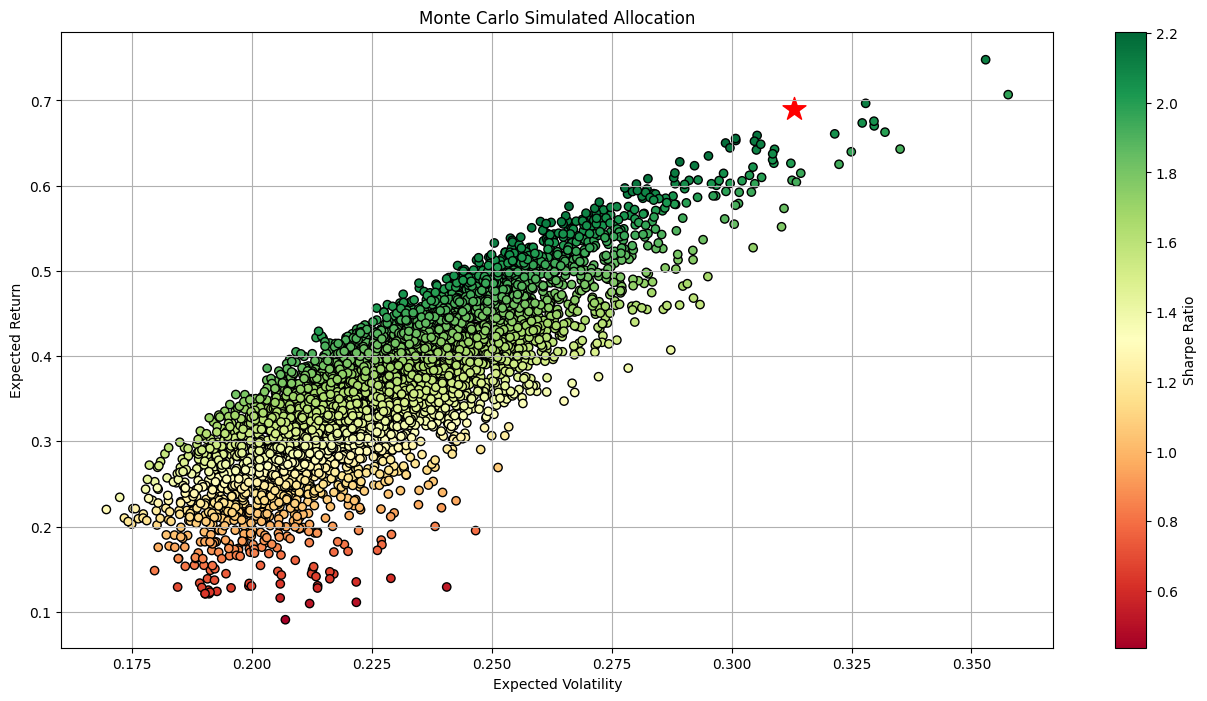

In [98]:
# Visualize the simulated portfolio for risk and return
fig = plt.figure()
ax = plt.axes()

ax.set_title('Monte Carlo Simulated Allocation')

# Simulated portfolios
fig.colorbar(ax.scatter(port_vols, port_rets, c=port_rets / port_vols,
                        marker='o', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio')

# Maximum sharpe ratio portfolio
ax.scatter(msrp['volatility'], msrp['returns'], c='red', marker='*', s = 300, label='Max Sharpe Ratio')

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)

### Efficient Frontier

In [99]:
# Import optimization module from scipy
import scipy.optimize as sco

In [100]:
# Maximizing sharpe ratio
def min_sharpe_ratio(weights):
    return -portfolio_stats(weights)[2]

In [101]:
# Each asset boundary ranges from 0 to 1
tuple((0, 1) for x in range(numofasset))

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [102]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(numofasset))
initial_wts = numofasset*[1./numofasset]

In [103]:
# Optimizing for maximum sharpe ratio
opt_sharpe = sco.minimize(min_sharpe_ratio, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)

In [104]:
opt_sharpe

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.217921075499191
       x: [ 3.879e-19  4.704e-01  0.000e+00  0.000e+00  5.296e-01]
     nit: 6
     jac: [ 4.206e-01 -4.335e-04  1.120e+00  4.796e-02  3.850e-04]
    nfev: 36
    njev: 6

In [105]:
# Portfolio weights
list(zip(symbols,np.around(opt_sharpe['x']*100,2)))

[('MDB', np.float64(0.0)),
 ('TSLA', np.float64(47.04)),
 ('SHEL', np.float64(0.0)),
 ('LGFRY', np.float64(0.0)),
 ('XOM', np.float64(52.96))]

In [106]:
weights1 = [item[1] for item in zip(symbols, np.around(opt_sharpe['x']*100, 2))]
weights1

[np.float64(0.0),
 np.float64(47.04),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(52.96)]

In [107]:
#Calculate portfolio daily returns
maxsharpe_returns = returns.dot(weights1)
maxsharpe_returns

,0
0,0.000000
1,1.313029
2,0.348693
3,-0.469862
4,0.013912
...,...
206,0.177433
207,-0.724677
208,0.078618
209,4.794557


In [108]:
# Portfolio stats
stats = ['Returns', 'Volatility', 'Sharpe Ratio']
list(zip(stats,np.around(portfolio_stats(opt_sharpe['x']),4)))

[('Returns', np.float64(0.7266)),
 ('Volatility', np.float64(0.3276)),
 ('Sharpe Ratio', np.float64(2.2179))]

In [109]:
# Minimize the variance
def min_variance(weights):
    return portfolio_stats(weights)[1]**2

In [110]:
# Optimizing for minimum variance
opt_var = sco.minimize(min_variance, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)

In [111]:
opt_var

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.028272106558620183
       x: [ 4.004e-01  0.000e+00  0.000e+00  5.996e-01  0.000e+00]
     nit: 12
     jac: [ 5.654e-02  6.685e-02  5.919e-02  5.654e-02  1.004e-01]
    nfev: 72
    njev: 12

In [112]:
# Portfolio weights
list(zip(symbols,np.around(opt_var['x']*100,2)))

[('MDB', np.float64(40.04)),
 ('TSLA', np.float64(0.0)),
 ('SHEL', np.float64(0.0)),
 ('LGFRY', np.float64(59.96)),
 ('XOM', np.float64(0.0))]

In [113]:
weights2 = [item[1] for item in zip(symbols, np.around(opt_var['x']*100, 2))]
weights2

[np.float64(40.04),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(59.96),
 np.float64(0.0)]

In [114]:
minvar_returns = returns.dot(weights2)
minvar_returns

,0
0,0.000000
1,1.607590
2,1.535866
3,0.894251
4,-0.287511
...,...
206,-0.039869
207,-1.402554
208,-0.880537
209,1.770760


In [115]:
# Portfolio stats
list(zip(stats,np.around(portfolio_stats(opt_var['x']),4)))

[('Returns', np.float64(0.2218)),
 ('Volatility', np.float64(0.1681)),
 ('Sharpe Ratio', np.float64(1.3192))]

In [116]:
# Minimize the volatility
def min_volatility(weights):
    return portfolio_stats(weights)[1]

In [117]:
targetrets = linspace(0.28,0.44,100)
tvols = []

for tr in targetrets:

    ef_cons = ({'type': 'eq', 'fun': lambda x: portfolio_stats(x)[0] - tr},
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    opt_ef = sco.minimize(min_volatility, initial_wts, method='SLSQP', bounds=bnds, constraints=ef_cons)

    tvols.append(opt_ef['fun'])

targetvols = array(tvols)

/tmp/ipython-input-118-1495118366.py:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  fig.colorbar(ax.scatter(targetvols, targetrets, c=targetrets / targetvols,


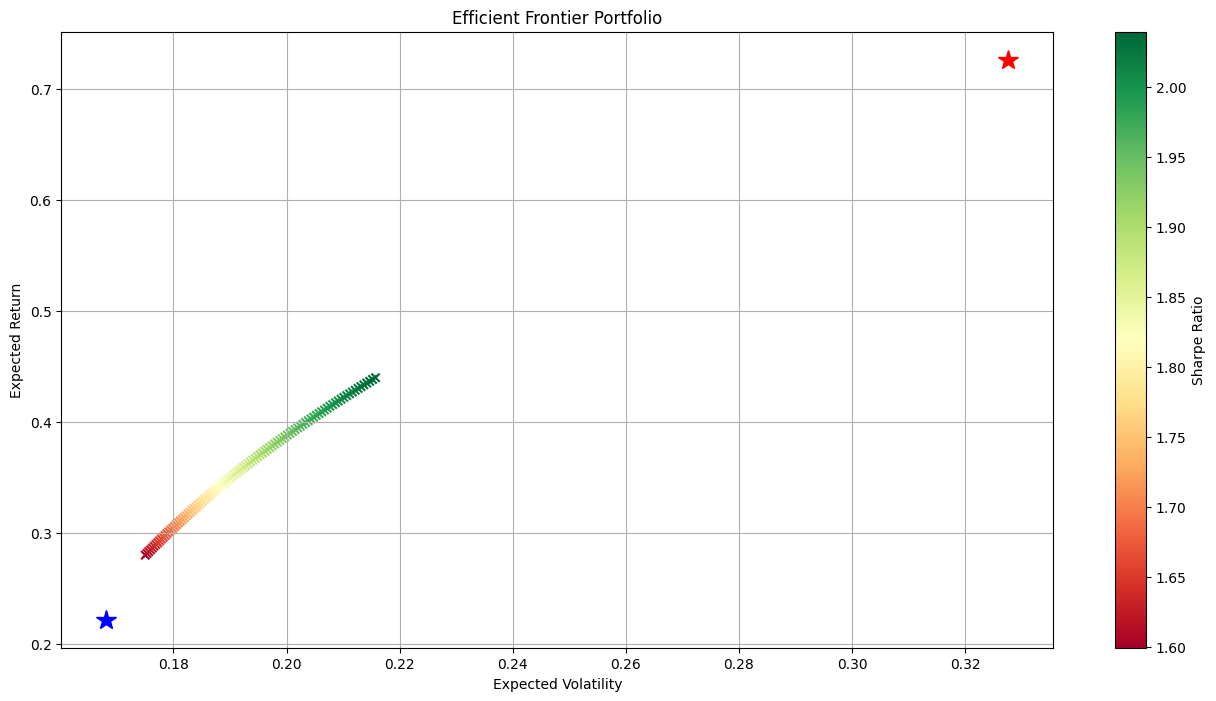

In [118]:
# Visualize the simulated portfolio for risk and return
fig = plt.figure()
ax = plt.axes()

ax.set_title('Efficient Frontier Portfolio')

# Efficient Frontier
fig.colorbar(ax.scatter(targetvols, targetrets, c=targetrets / targetvols,
                        marker='x', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio')

# Maximum Sharpe Portfolio
ax.plot(portfolio_stats(opt_sharpe['x'])[1], portfolio_stats(opt_sharpe['x'])[0], 'r*', markersize =15.0)

# Minimum Variance Portfolio
ax.plot(portfolio_stats(opt_var['x'])[1], portfolio_stats(opt_var['x'])[0], 'b*', markersize =15.0)

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)

In [119]:
import yfinance as yf
import pandas as pd

# Define the start and end dates for the data
start_date = '2022-01-01'
end_date = '2023-05-31'

# Download the historical data of the S&P 500 Index
sp500 = yf.download('^GSPC', start=start_date, end=end_date, progress=False, auto_adjust=False)

# Calculate the daily returns based on 'Adj Close'
sp500['Daily Return'] = sp500['Adj Close'].pct_change()

# Calculate the cumulative returns
sp500['Cumulative Return'] = (1 + sp500['Daily Return']).cumprod()

# Print the DataFrame with cumulative returns
print(sp500[['Adj Close', 'Cumulative Return']].tail())

# Save the DataFrame to a CSV file
sp500[['Adj Close', 'Cumulative Return']].to_csv('sp500_returns.csv', index=False)

# Read the CSV file into a DataFrame
df = pd.read_csv('sp500_returns.csv')

# Extract the cumulative return values as a list
sp500_returns = df['Cumulative Return'].tolist()


Price         Adj Close Cumulative Return
Ticker            ^GSPC                  
Date                                     
2023-05-23  4145.580078          0.864282
2023-05-24  4115.240234          0.857957
2023-05-25  4151.279785          0.865470
2023-05-26  4205.450195          0.876764
2023-05-30  4205.520020          0.876778


[*********************100%***********************]  1 of 1 completed


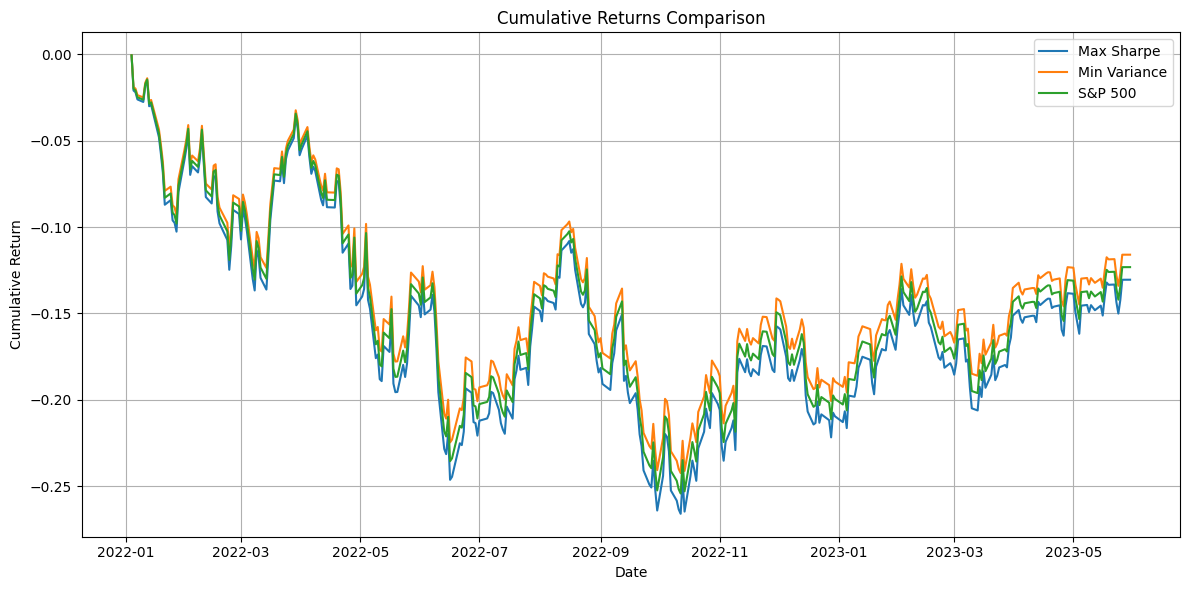

In [120]:
import matplotlib.pyplot as plt

# Keep the date index for x-axis labels
sp500 = yf.download('^GSPC', start='2022-01-01', end='2023-05-31', auto_adjust=False)
sp500['Daily Return'] = sp500['Adj Close'].pct_change()

# Create dummy strategy returns
maxsharpe_returns = sp500['Daily Return'] * 1.05
minvar_returns = sp500['Daily Return'] * 0.95

# Build DataFrame
comparation = pd.DataFrame(index=sp500.index)
comparation['maxsharpe daily returns'] = maxsharpe_returns
comparation['minvar daily returns'] = minvar_returns
comparation['sp500 daily returns'] = sp500['Daily Return']
comparation['maxsharpe cumulative returns'] = (1 + maxsharpe_returns).cumprod() - 1
comparation['minvar cumulative returns'] = (1 + minvar_returns).cumprod() - 1
comparation['sp500 cumulative returns'] = (1 + sp500['Daily Return']).cumprod() - 1
comparation.dropna(inplace=True)

# Plot cumulative returns
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(comparation.index, comparation['maxsharpe cumulative returns'], label='Max Sharpe')
ax.plot(comparation.index, comparation['minvar cumulative returns'], label='Min Variance')
ax.plot(comparation.index, comparation['sp500 cumulative returns'], label='S&P 500')
ax.set_title('Cumulative Returns Comparison')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


######